<a href="https://colab.research.google.com/github/rutwa011/Customer-Segmentation-For-Retail/blob/main/Customer_Segmentation_For_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Segmentation For Retail**


## **Importing and Understanding the Data**

In [ ]:
import pandas as pd

In [ ]:
# code to import the dataset
from google.colab import files
uploaded = files.upload()

Saving retail_data.csv to retail_data.csv


In [ ]:
#load the dataset
import io
data = pd.read_csv(io.BytesIO(uploaded['retail_data.csv']))

In [ ]:
# inspecting the data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

In [ ]:
# check the sum of missing values in each colums
print(data.isnull().sum())

Transaction_ID      333
Customer_ID         308
Name                382
Email               347
Phone               362
Address             315
City                248
State               281
Zipcode             340
Country             271
Age                 173
Gender              317
Income              290
Customer_Segment    215
Date                359
Year                350
Month               273
Time                350
Total_Purchases     361
Amount              357
Total_Amount        350
Product_Category    283
Product_Brand       281
Product_Type          0
Feedback            184
Shipping_Method     337
Payment_Method      297
Order_Status        235
Ratings             184
products              0
dtype: int64


In [ ]:
print(data.head())

   Transaction_ID  Customer_ID                 Name                Email  \
0       8691788.0      37249.0  Michelle Harrington    Ebony39@gmail.com   
1       2174773.0      69749.0          Kelsey Hill     Mark36@gmail.com   
2       6679610.0      30192.0         Scott Jensen    Shane85@gmail.com   
3       7232460.0      62101.0        Joseph Miller     Mary34@gmail.com   
4       4983775.0      27901.0        Debra Coleman  Charles30@gmail.com   

          Phone                      Address        City            State  \
0  1.414787e+09            3959 Amanda Burgs    Dortmund           Berlin   
1  6.852900e+09           82072 Dawn Centers  Nottingham          England   
2  8.362160e+09            4133 Young Canyon     Geelong  New South Wales   
3  2.776752e+09  8148 Thomas Creek Suite 100    Edmonton          Ontario   
4  9.098268e+09    5813 Lori Ports Suite 269     Bristol          England   

   Zipcode    Country  ...  Total_Amount Product_Category  Product_Brand  \
0  7

## **Handling Missing Values**
1. Columns without missing values are **Product_Type and products** so no action is needed for them.
2. Colums that are critical columns and must not have a missing values as thesy are unique identifiers: **Transaction_ID and Customer_ID**


In [ ]:
# drop rows with missing vales in columns Transaction_ID and Customer_ID
data = data.dropna(subset=['Transaction_ID', 'Customer_ID'])

3. Categorical Columns with Missing Values
Columns:**Gender, City, State, Customer_Segment, Country, Payment_Method, etc**
Using mode(most frequent vale) to fill missing values in the columns.


In [ ]:
# fill missing categoricla columns with mode
categorical_cols = ['Gender', 'City', 'State', 'Customer_Segment', 'Country', 'Payment_Method', 'Shipping_Method', 'Order_Status']
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

<ipython-input-8-87d947533724>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


4. Numerical Columns with Missing Values
Columns: **Age, Income, Total_Purchases, Amount, Total_Amount, etc**
Using median (less sensitive to outliers) to fill missing values in numerical columns.

In [ ]:

# as income column has values low, medium and high then it cannot be considered into
# numerical columns so converting it into number
data['Income'] = data['Income'].replace({'Low': 1, 'Medium': 2, 'High': 3})


<ipython-input-9-4e96bc16255b>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Income'] = data['Income'].replace({'Low': 1, 'Medium': 2, 'High': 3})


In [ ]:
#converting the invalid strings into NaN
data['Income'] = pd.to_numeric(data['Income'], errors= 'coerce')

In [ ]:
# filling missing numerical columns with median
numerical_cols = ['Age', 'Income', 'Total_Purchases', 'Amount', 'Total_Amount']
for col in numerical_cols:
    data[col].fillna(data[col].median(), inplace=True)

<ipython-input-11-c4bf62e0ebeb>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


5. Date and Time Columns


*   **Date:** Ensuring the column is in date format. then filling missing values with the most frequent date.
*   **Year:** filling with a placeholder
* **Month:** using mode for this.
* **Time:** Using the mode or default time like 00:00:00



In [ ]:
#converting Date to datetime format and filling the missing values
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Date'].fillna(data['Date'].mode()[0], inplace=True)

#filling the year and month with mode or default
data['Year'].fillna(2023, inplace=True)
data['Month'].fillna(data['Month'].mode()[0], inplace=True)

#filling the time with mode or default
data['Time'].fillna(data['Time'].mode()[0], inplace=True)

<ipython-input-12-78a3d56f9a12>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Date'].fillna(data['Date'].mode()[0], inplace=True)
<ipython-input-12-78a3d56f9a12>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

6. Columns with High Missing Values
Columns: **Feedback and Ratings**
* If the colmns is relevant for analysis and has too many missing values then elevate it or if not then just drop it.
*Alternatively, filling missing values with placeholder.

In [ ]:
# filling Feedback and Rating
data['Feedback'].fillna('No Feedback', inplace=True)
data['Ratings'].fillna(data['Ratings'].median(), inplace=True)

<ipython-input-13-e224d9fdd7ab>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Feedback'].fillna('No Feedback', inplace=True)
<ipython-input-13-e224d9fdd7ab>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

7. Columns with Rare Missing Values
Columns: **Email, Phone, Zipcode**
- For optional information like contact details
* Filling missing values with 'Unknown' or a default placeholder.
* Dropping rows if contact information is important.

In [ ]:
#filling Email, Phoen and Zipcode with placeholders
data['Email'].fillna('Unknown', inplace=True)
data['Phone'].fillna('Unknown', inplace=True)
data['Zipcode'].fillna('Unknown', inplace=True)

<ipython-input-14-0ef61d88cfbf>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Email'].fillna('Unknown', inplace=True)
<ipython-input-14-0ef61d88cfbf>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [ ]:
print(data.isnull().sum())

Transaction_ID        0
Customer_ID           0
Name                380
Email                 0
Phone                 0
Address             313
City                  0
State                 0
Zipcode               0
Country               0
Age                   0
Gender                0
Income                0
Customer_Segment      0
Date                  0
Year                  0
Month                 0
Time                  0
Total_Purchases       0
Amount                0
Total_Amount          0
Product_Category    282
Product_Brand       278
Product_Type          0
Feedback              0
Shipping_Method       0
Payment_Method        0
Order_Status          0
Ratings               0
products              0
dtype: int64


8. Columns like Name and Address columns also have few null values and as this information is valuable for ensuring final analysis isnot skewed by dropping rows due to missing data.

**Reason:**
* Names may not influence segmantation but could be useful when analyzing purchasing behaviour tied to demographics or personalization strategies
* Address might help in geographically analysing customer segments, thu sretailing these records is beneficial.

In [ ]:
# filling missing name and address
data['Name'].fillna('Anonymous Customer', inplace=True)
data['Address'].fillna('No Address Found', inplace=True)

<ipython-input-16-15f33cf39d73>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Name'].fillna('Anonymous Customer', inplace=True)
<ipython-input-16-15f33cf39d73>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

9. For Columns like **Product_Category and Product_Brand** filling the missing enteries with placeholder

In [ ]:
#fill Product_Category and Product_Brands with placeholder
data['Product_Category'].fillna('Not specified', inplace=True)
data['Product_Brand'].fillna('Not Specified', inplace=True)

<ipython-input-17-e33593ab11c8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Product_Category'].fillna('Not specified', inplace=True)
<ipython-input-17-e33593ab11c8>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [ ]:
print(data.isnull().sum())

Transaction_ID      0
Customer_ID         0
Name                0
Email               0
Phone               0
Address             0
City                0
State               0
Zipcode             0
Country             0
Age                 0
Gender              0
Income              0
Customer_Segment    0
Date                0
Year                0
Month               0
Time                0
Total_Purchases     0
Amount              0
Total_Amount        0
Product_Category    0
Product_Brand       0
Product_Type        0
Feedback            0
Shipping_Method     0
Payment_Method      0
Order_Status        0
Ratings             0
products            0
dtype: int64


## **Outlier Detection and Removal**
- Outliers are the extreme values that deviate significantly from other observations and can skew analysis results and affect the performance of models.

Identify Numerical Columns
* Outliers can only be detected in numerical columns, so identifing them.

In [ ]:
# indentifing numerical columns in the dataset
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("Numerical Columns: ", numerical_cols)

Numerical Columns:  ['Transaction_ID', 'Customer_ID', 'Age', 'Income', 'Year', 'Total_Purchases', 'Amount', 'Total_Amount', 'Ratings']


Exploring the data
* Getting the overview of numerical columns using descriptive statistics.

In [ ]:
#descriptive statistics
print(data[numerical_cols].describe())

       Transaction_ID    Customer_ID            Age         Income  \
count    3.013690e+05  301369.000000  301369.000000  301369.000000   
mean     5.495413e+06   55004.580567      35.478204       1.930325   
std      2.595610e+06   26006.276618      15.016295       0.750282   
min      1.000007e+06   10000.000000      18.000000       1.000000   
25%      3.247449e+06   32466.000000      22.000000       1.000000   
50%      5.498984e+06   55009.000000      32.000000       2.000000   
75%      7.739198e+06   77511.000000      46.000000       2.000000   
max      9.999995e+06   99999.000000      70.000000       3.000000   

                Year  Total_Purchases         Amount   Total_Amount  \
count  301369.000000    301369.000000  301369.000000  301369.000000   
mean     2023.164871         5.359297     255.183696    1367.322279   
std         0.371065         2.866682     141.311314    1128.369707   
min      2023.000000         1.000000      10.000219      10.003750   
25%      2023.

Removing the **Transaction_ID, Customer_ID, Year** columns from the list as they are not relevant columns for outlier detection

In [ ]:
# identifying numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# removing irrelevant columns
irrelevant_cols = ['Transaction_ID', 'Customer_ID', 'Year']
for col in irrelevant_cols:
  if col in numerical_cols:
    numerical_cols.remove(col)

print("Updated Numerical Columns: ", numerical_cols)

Updated Numerical Columns:  ['Age', 'Income', 'Total_Purchases', 'Amount', 'Total_Amount', 'Ratings']


**Visualizing Outliers**
* Using boxplots or histograms to visualize the spread of data.

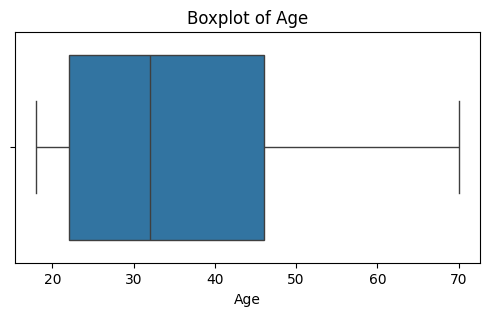

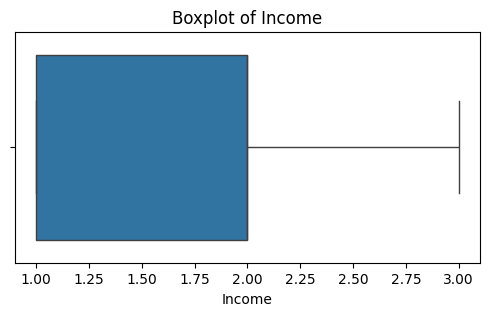

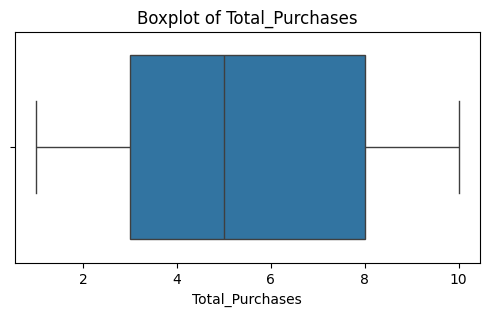

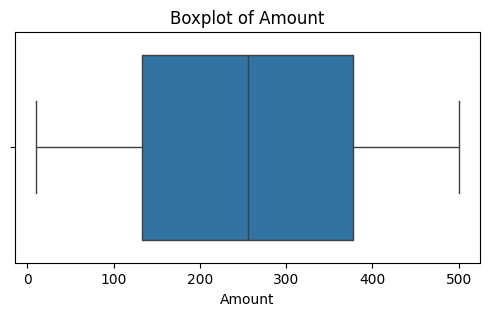

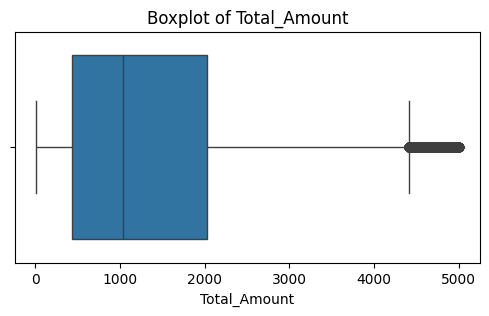

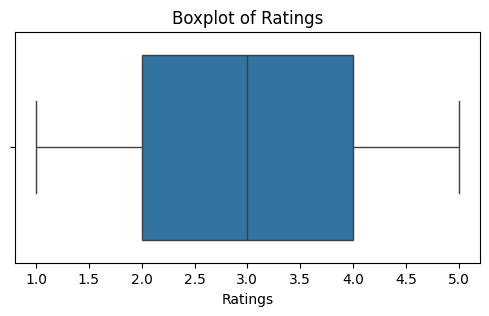

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ploting boxplot for each numerical column
for col in numerical_cols:
  plt.figure(figsize=(6,3))
  sns.boxplot(x=data[col])
  plt.title(f"Boxplot of {col}")
  plt.show()

**Detecting Outliers**

Using the IQR Method : The Interquartile Range(IQR) method identifies outliers as values outside the range


*   **Lower Bound:** Q1 -1.5 * IQR
*   **Upper Bound:** Q3 + 1.5 * IQR



In [ ]:
# detecting outliers using the IQR method
for col in numerical_cols:
  Q1 = data[col].quantile(0.25) # first quartile
  Q3 = data[col].quantile(0.75) # third quartile
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  print(f"{col}: Lower Bound = {lower_bound}, Upper Bound = {upper_bound}")
  print(f"Outliers in {col}: ")
  print(data[(data[col] < lower_bound) | (data[col] > upper_bound)][col])

Age: Lower Bound = -14.0, Upper Bound = 82.0
Outliers in Age: 
Series([], Name: Age, dtype: float64)
Income: Lower Bound = -0.5, Upper Bound = 3.5
Outliers in Income: 
Series([], Name: Income, dtype: float64)
Total_Purchases: Lower Bound = -4.5, Upper Bound = 15.5
Outliers in Total_Purchases: 
Series([], Name: Total_Purchases, dtype: float64)
Amount: Lower Bound = -233.7527293, Upper Bound = 744.3398803
Outliers in Amount: 
Series([], Name: Amount, dtype: float64)
Total_Amount: Lower Bound = -1943.61893875, Upper Bound = 4410.79256805
Outliers in Total_Amount: 
150       4885.287161
159       4850.773617
395       4487.127690
400       4518.677874
484       4755.346608
             ...     
301723    4773.836796
301766    4802.759630
301883    4588.640335
301904    4884.033570
301960    4934.155150
Name: Total_Amount, Length: 3959, dtype: float64
Ratings: Lower Bound = -1.0, Upper Bound = 7.0
Outliers in Ratings: 
Series([], Name: Ratings, dtype: float64)


Now here no outliers are detected in the columns **Age, Income, Total_purchases, Amount and Ratings.**

In Column like **Total_Amount** outliers are present exceeding the upper bound.

* So here capping the outliers is the best aproach to handle as this ensures the data remains useful while minizing skewness from extreme values.

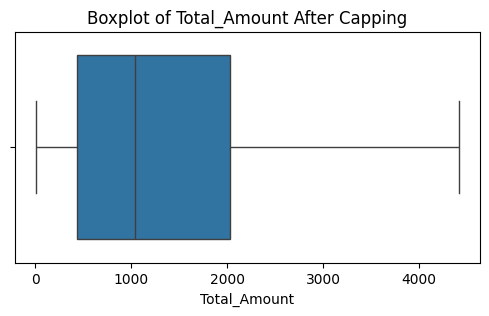

In [ ]:
# capping the outliers in Total_Amount Columns
upper_bound = 4410.79 # calculated upper bound using IQR
data['Total_Amount'] = data['Total_Amount'].apply(lambda x: min(x, upper_bound))

# verifing the chnges with new boxplot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Total_Amount'])
plt.title(f"Boxplot of Total_Amount After Capping")
plt.show()

Using the **Z-Score** method: The Z-Score measures how far the data point is from the mean.

* Z-score > 3 pr < -3 as an outlier

In [ ]:
from scipy.stats import zscore

# Calculating z-scores
data['Z_Score'] = zscore(data['Total_Amount'])
print(data[data['Z_Score'].abs() > 3]) # outliers with z-score > 3

Empty DataFrame
Columns: [Transaction_ID, Customer_ID, Name, Email, Phone, Address, City, State, Zipcode, Country, Age, Gender, Income, Customer_Segment, Date, Year, Month, Time, Total_Purchases, Amount, Total_Amount, Product_Category, Product_Brand, Product_Type, Feedback, Shipping_Method, Payment_Method, Order_Status, Ratings, products, Z_Score]
Index: []

[0 rows x 31 columns]


Verifying the Changes after handling the Outliers

                 Age         Income  Total_Purchases         Amount  \
count  301369.000000  301369.000000    301369.000000  301369.000000   
mean       35.478204       1.930325         5.359297     255.183696   
std        15.016295       0.750282         2.866682     141.311314   
min        18.000000       1.000000         1.000000      10.000219   
25%        22.000000       1.000000         3.000000     133.031999   
50%        32.000000       2.000000         5.000000     255.494139   
75%        46.000000       2.000000         8.000000     377.555152   
max        70.000000       3.000000        10.000000     499.997911   

        Total_Amount        Ratings  
count  301369.000000  301369.000000  
mean     1363.933104       3.162495  
std      1118.603854       1.320354  
min        10.003750       1.000000  
25%       439.285376       2.000000  
50%      1041.205562       3.000000  
75%      2027.888253       4.000000  
max      4410.790000       5.000000  


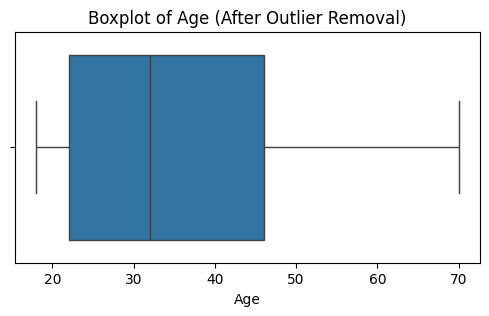

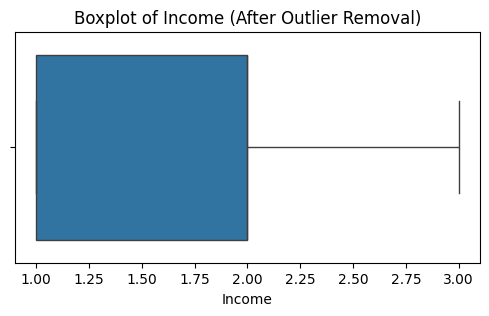

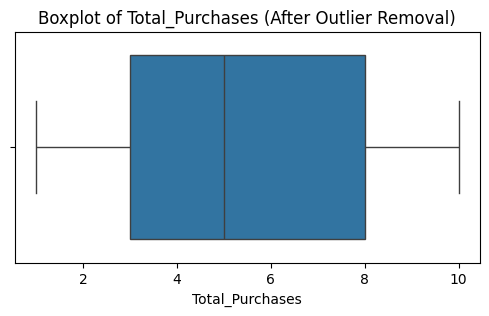

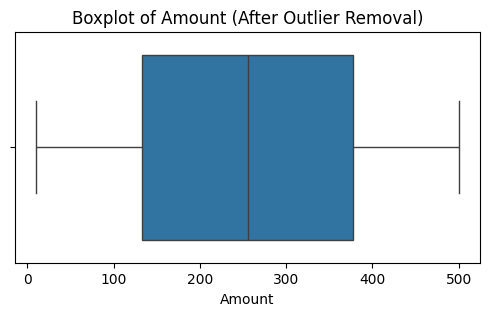

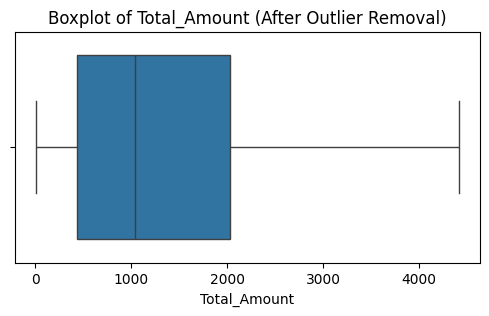

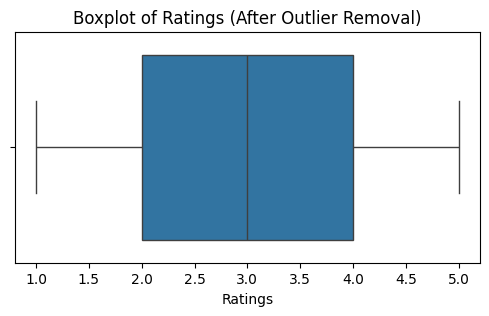

In [ ]:
# summary statistics
print(data[numerical_cols].describe())

# chacking for remaining outliers with boxplots
for col in numerical_cols:
  plt.figure(figsize=(6,3))
  sns.boxplot(x=data[col])
  plt.title(f"Boxplot of {col} (After Outlier Removal)")
  plt.show()

In [ ]:
# saving the clean data to a new file
data.to_csv('cleaned_retail_data.csv', index=False)

## **Engineering New Features**


1.   Total Revenue Calculation
2.   Frequency Calculation
3. Recency Calculation



**1. Total Revenue Calculation:** Total Revenue represents the total amount spent by each customer on a single transaction.
* Formula: Total Revenue = Quantity(Total_Purchases) * Unit Price(Amount)

* Total Revenue is critical for identifying high-value customers and understanding spending behaviours.


In [ ]:
#checking for missing or negative values
print("Missing values in Total_Purchases: ", data['Total_Purchases'].isnull().sum())
print("Missing values in Amount: ", data['Amount'].isnull().sum())
print("Negative valeues in Total_Purchases: ", (data['Total_Purchases'] < 0).sum())
print("Negative values in Amount: ", (data['Amount'] < 0).sum())

# removing rows with invalid data
data = data[(data['Total_Purchases'] > 0) & (data['Amount'] > 0)]

# calculating total revenue
data['Total_Revenue'] = data['Total_Purchases'] * data['Amount']
print("Total Revenue calcualted successfully.")

Missing values in Total_Purchases:  0
Missing values in Amount:  0
Negative valeues in Total_Purchases:  0
Negative values in Amount:  0
Total Revenue calcualted successfully.


2. **Frequency Calculation:** Frequency is the ccount of transactions for each customer. This helps to determine how often a customer interacts with the business, indicating loyalty and repeat behaviour.

* Using Customer_ID to group transactions by each customer.
* Counting the number of transactions for each customer.

In [ ]:
# grouping by Customer_ID and count transactions
frequency = data.groupby('Customer_ID').size().reset_index(name='Frequency')

# merging frequency back into the original dataset
data = data.merge(frequency, on='Customer_ID', how='left')
print("Frequency feature added successfully.")

Frequency feature added successfully.


3. **Recency Calculation:** Recency measures the time since the customer's last transaction. Recent customers are more likely to engage, making this feature vital for segmentation and predictive modeling.

* **Calculate Recency:** Finding the most recent transaction for each customer. And substarcting this date from the dataset's minimum date.

In [ ]:
# ensuring Date is in datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

#drop rows with invalid dates
data = data.dropna(subset=['Date'])

#finding the most recent transaction for each customer
max_date = data['Date'].max()
recency = data.groupby('Customer_ID')['Date'].max().reset_index()
recency['Recency'] = (max_date - recency['Date']).dt.days

#merging Recency back into the dataset
data = data.merge(recency[['Customer_ID', 'Recency']], on='Customer_ID', how='left')
print("Recency feature added successfully.")

Recency feature added successfully.


Verifying the added new features.

Total_Revenue    0
Frequency        0
Recency          0
dtype: int64


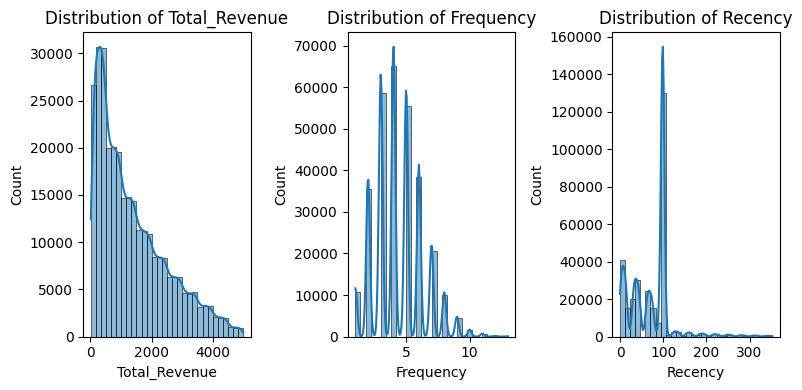

In [ ]:
# check for null or invalid values
print(data[['Total_Revenue', 'Frequency', 'Recency']].isnull().sum())

#visualizing distributions
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
for i, col in enumerate(['Total_Revenue', 'Frequency', 'Recency'], 1):
  plt.subplot(1,3,i)
  sns.histplot(data[col], kde=True, bins=30)
  plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

## **Normalization of Data**

Normalization is essential for ensuring that all features contribute equally to analysis or modeling.

If features are on vastly different scales, those with larger ranhes(e.g Total Revenue) can dominate the analysis, leading to biased results.

* For this case, Min-Max Scaling will be used for ease of interpretability.
* Min-Max Scaling (Rescales values to a range of [0, 1]):

Formula: **Xscaled = X - Xmin / Xmax - Xmin**

This is ideal when there's no extreme outlier.


In [ ]:
from sklearn.preprocessing import MinMaxScaler

#selecting the columns to normalize
cols_to_normalize = ['Total_Revenue', 'Frequency', 'Recency']

#initiating Min-Max Scaler
scaler = MinMaxScaler()

#applying scaling
data_normalized = scaler.fit_transform(data[cols_to_normalize])

#creating a new dataframe with normalized columns
normalized_df = pd.DataFrame(data_normalized, columns=[col + '_Scaled' for col in cols_to_normalize])

#concatenate normalized data with the original dataset
data = pd.concat([data, normalized_df], axis=1)

print(data.head())

   Transaction_ID  Customer_ID                 Name                Email  \
0       8691788.0      37249.0  Michelle Harrington    Ebony39@gmail.com   
1       2174773.0      69749.0          Kelsey Hill     Mark36@gmail.com   
2       6679610.0      30192.0         Scott Jensen    Shane85@gmail.com   
3       7232460.0      62101.0        Joseph Miller     Mary34@gmail.com   
4       4983775.0      27901.0        Debra Coleman  Charles30@gmail.com   

          Phone                      Address        City            State  \
0  1414786801.0            3959 Amanda Burgs    Dortmund           Berlin   
1  6852899987.0           82072 Dawn Centers  Nottingham          England   
2  8362160449.0            4133 Young Canyon     Geelong  New South Wales   
3  2776751724.0  8148 Thomas Creek Suite 100    Edmonton          Ontario   
4  9098267635.0    5813 Lori Ports Suite 269     Bristol          England   

   Zipcode    Country  ...  Order_Status Ratings           products   Z_Score  \

Verifying the Normalization: After the normalization, all the values in the selected columns should be between 0 and 1.

       Total_Revenue_Scaled  Frequency_Scaled  Recency_Scaled
count         301369.000000     301369.000000   301369.000000
mean               0.272099          0.280524        0.206802
std                0.226098          0.153970        0.138581
min                0.000000          0.000000        0.000000
25%                0.086055          0.166667        0.099150
50%                0.206866          0.250000        0.263456
75%                0.404756          0.416667        0.280453
max                1.000000          1.000000        1.000000


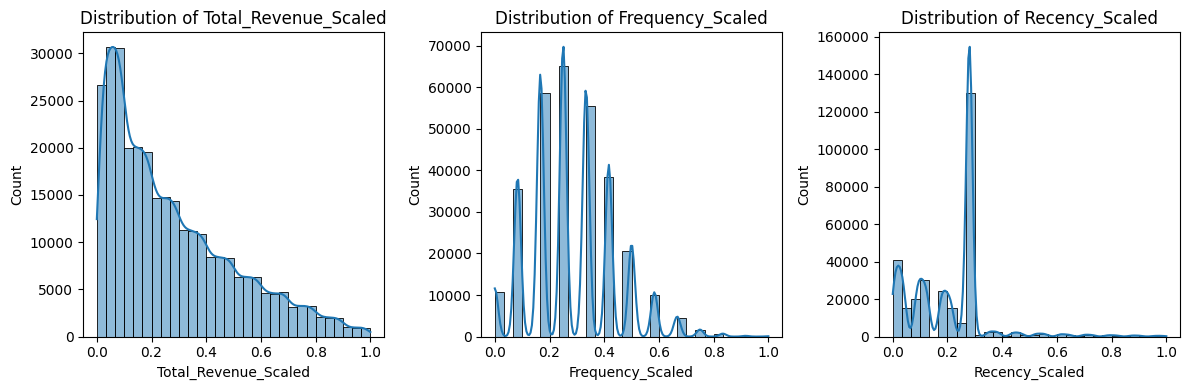

In [ ]:
#checking the ranges of normalized columns
print(data[['Total_Revenue_Scaled', 'Frequency_Scaled', 'Recency_Scaled']].describe())

#visualizing distributions of normalized data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,4))
for i, col in enumerate(['Total_Revenue_Scaled', 'Frequency_Scaled', 'Recency_Scaled'], 1):
  plt.subplot(1,3,i)
  sns.histplot(data[col], kde=True, bins=30)
  plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

## **Performing Customer Segmentation**
a). Choosing a Clustering Method: Here using the **K-means Clustering** algorithm due to its simplicity and speed with large datasets. Also, it interpretability of results through centroids.

Technique to Find optimal k:
* **Elbow Method:** Evaluates the "inertia" (sum of squared distances to cluster centers).
* A significant drop in inertia at acertain k indicates the optimal numbers of clusters.

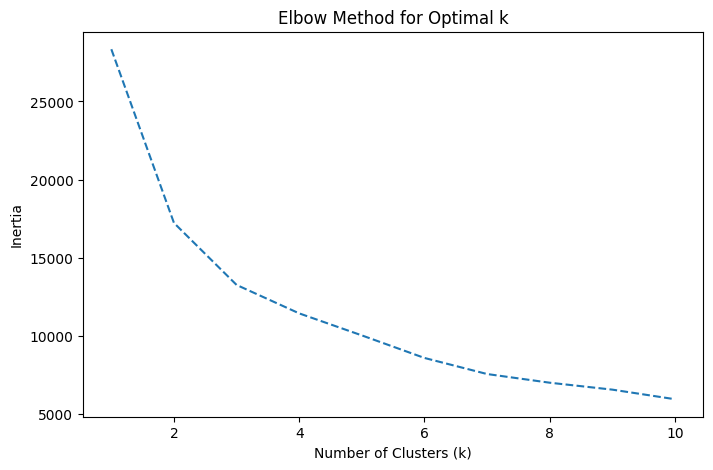

In [ ]:
import sklearn.cluster
import matplotlib.pyplot as plt

clustering_data = data[['Total_Revenue_Scaled', 'Frequency_Scaled', 'Recency_Scaled']]

#claculating inertia for a different k
inertia = []
range_clusters = range(1, 11)

for k in range_clusters:
  kmeans = sklearn.cluster.KMeans(n_clusters=k, random_state=42)
  kmeans.fit(clustering_data)
  inertia.append(kmeans.inertia_)

#plotting the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, linestyle = '--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

From the graph, there is a sharpest decrease between k = 2 and k = 4

After k = 4, the reduction in inertia becomes less steep, suggesting that k = 4 is a good choice.

Performing K-Means Clustering

In [ ]:
# applying k-means with chosen k i.e 4
optimal_k = 4
kmeans = sklearn.cluster.KMeans(n_clusters = optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(clustering_data)

#viewing the cluster centers
print("Cluster Centers:\n", kmeans.cluster_centers_)

Cluster Centers:
 [[0.39078219 0.23693879 0.21569694]
 [0.11305489 0.18219796 0.26928021]
 [0.14566608 0.43452781 0.12414912]
 [0.70011981 0.29911041 0.19768429]]


Analyze the Clusters: To better understand the characteristics of each cluster and derive business insights

* Step 1: Grouping customers by clusters
* Step 2: Analaying cluster averages for key features like Total_Revenue, Frequency and Recency.

In [ ]:
# grouping clusters and calcualting mean for analysis
cluster_analysis = data.groupby('Cluster').mean(numeric_only=True)
print(cluster_analysis)

# count the number of customers in each cluster
print(data['Cluster'].value_counts())

         Transaction_ID   Customer_ID        Age    Income         Year  \
Cluster                                                                   
0          5.492475e+06  54934.758191  35.617056  1.928948  2023.163504   
1          5.496245e+06  54946.655666  35.205048  1.929719  2023.134363   
2          5.500212e+06  55022.298244  35.357469  1.933581  2023.203548   
3          5.489166e+06  55228.966555  36.138629  1.927889  2023.167343   

         Total_Purchases      Amount  Total_Amount   Ratings   Z_Score  \
Cluster                                                                  
0               6.572886  320.753163   1958.874974  3.154617  0.531862   
1               3.993887  185.916615    573.634177  3.168947 -0.706506   
2               4.328082  204.130642    739.324721  3.165675 -0.558383   
3               8.603272  410.598983   3475.544512  3.154011  1.887724   

         Total_Revenue  Frequency    Recency  Total_Revenue_Scaled  \
Cluster                           

Visualizing the Clusters

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


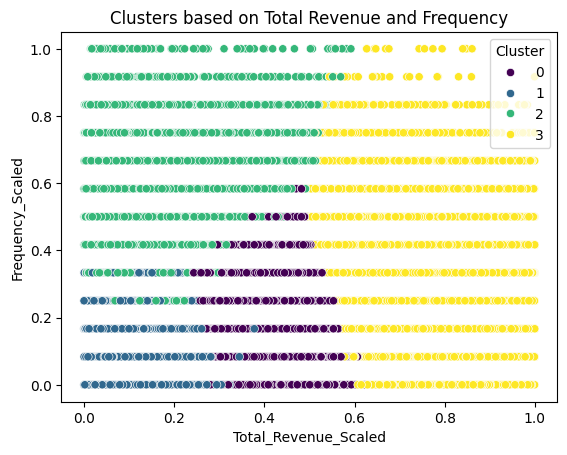

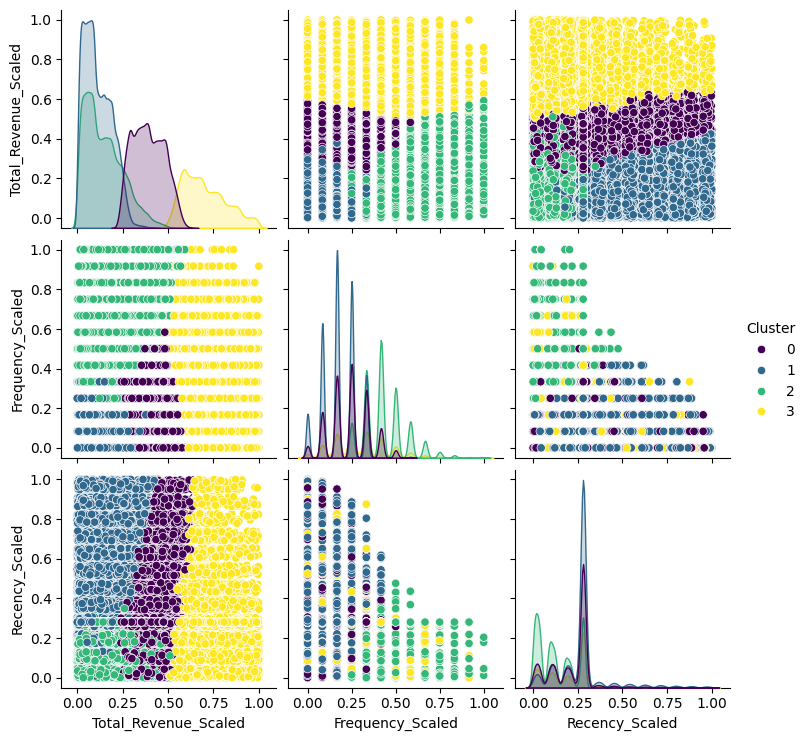

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#scatter plot for visualization
sns.scatterplot(data=data, x='Total_Revenue_Scaled', y='Frequency_Scaled', hue='Cluster', palette='viridis')
plt.title("Clusters based on Total Revenue and Frequency")
plt.show()

# pair plot fro comprhensive visualization
sns.pairplot(data, vars=['Total_Revenue_Scaled', 'Frequency_Scaled', 'Recency_Scaled'], hue='Cluster', palette='viridis')
plt.show()

From the above graph it can be interpreted that:

* **Cluster0:** This likely represents low-value, inactive customers, re-engagement needed.
* **Cluster1:** This represents past steady customers, focus on re-engagement.
* **Cluster2:** This represents hogh value, loyal customers, prioritize retention.
* **Cluster3:** This represents high-value customers who may not yet have reached loyalty levels, nuture for loyalty.

Cluster Distribution: This chart shows how many customers belong to each cluster, giving an overview of cluster size.

<ipython-input-38-94c6cfd5bd33>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')


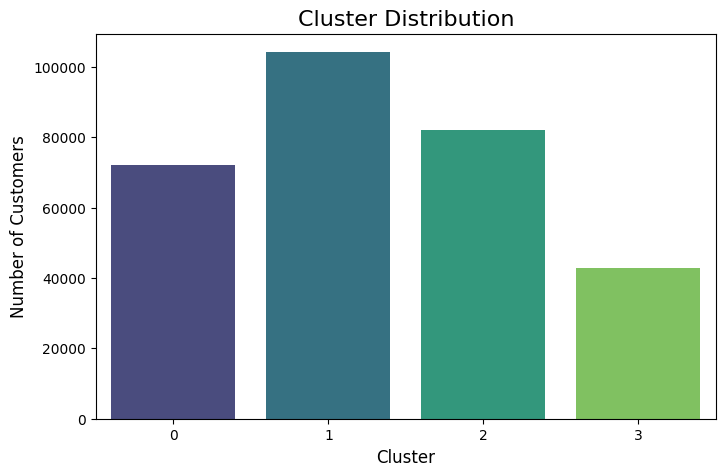

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# cluster distribution
cluster_counts = data['Cluster'].value_counts()

#plotting the bar chart
plt.figure(figsize=(8,5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.title('Cluster Distribution', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Correlation matrix to better understand the relationships between Total Revenue, Recency and Frequency.

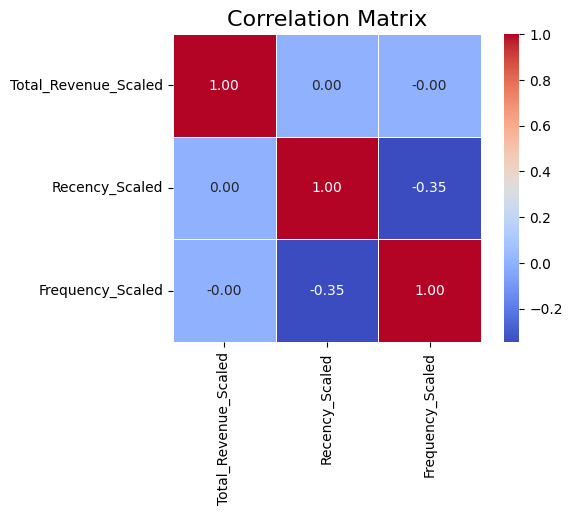

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#calculating the correlation matrix
correlation_matrix = data[['Total_Revenue_Scaled', 'Recency_Scaled', 'Frequency_Scaled']].corr()

#ploting the heatmap
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

Corelation between Recency_SCaled and Frequenty Scaled is -0.35, indicating a weak linear relationship.

* As the frequency increases, the recency tends to decrease slightly, which make sense in customer segmentation i.e frequent buyers tend to have more recent purchases.

Box Pot for Total Revenue by cluster

<ipython-input-40-ff6e2fc1dbc1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Total_Revenue', data=data, palette='viridis')


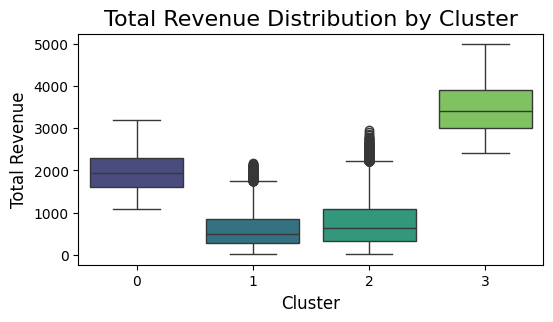

In [ ]:
# Plot a boxplot for Total Revenue values by Cluster
plt.figure(figsize=(6, 3))
sns.boxplot(x='Cluster', y='Total_Revenue', data=data, palette='viridis')
plt.title('Total Revenue Distribution by Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


Insights: This visualization showcase the high-vlaue customers( Cluster 3 ) and low-value customers ( Cluster 1 )

Business Action:
* Focus on marketing and engagement startegies on high-value customers (Cluster 3).
* Considering ways to improve spending amoung low-value customers (Cluster 1), such as promotions or loyalty programs.

## **Exporting the dataset**

In [ ]:
data.to_csv("customer_segments.csv", index=False)